In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Normalize the images to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0
# Reshape the data to include the channel dimension (needed for Keras)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
# Convert labels to categorical format
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
model = models.Sequential()
# Input layer (flattening the 28x28 image to a 784-dimensional vector)
model.add(layers.Flatten(input_shape=(28, 28, 1)))
# Hidden layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))  # Adding dropout for regularization
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
# Output layer with 10 neurons (one for each digit)
model.add(layers.Dense(10, activation='softmax'))
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8222 - loss: 0.5675 - val_accuracy: 0.9566 - val_loss: 0.1348
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9498 - loss: 0.1636 - val_accuracy: 0.9693 - val_loss: 0.0953
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9626 - loss: 0.1252 - val_accuracy: 0.9744 - val_loss: 0.0841
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9675 - loss: 0.1096 - val_accuracy: 0.9760 - val_loss: 0.0812
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9723 - loss: 0.0914 - val_accuracy: 0.9754 - val_loss: 0.0813
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9752 - loss: 0.0801 - val_accuracy: 0.9789 - val_loss: 0.0753
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9760 - loss: 0.0763 - val_accuracy: 0.9769 - val_loss: 0.0822
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9773 - loss: 0.0697

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9757 - loss: 0.0826
Test accuracy: 0.9794999957084656


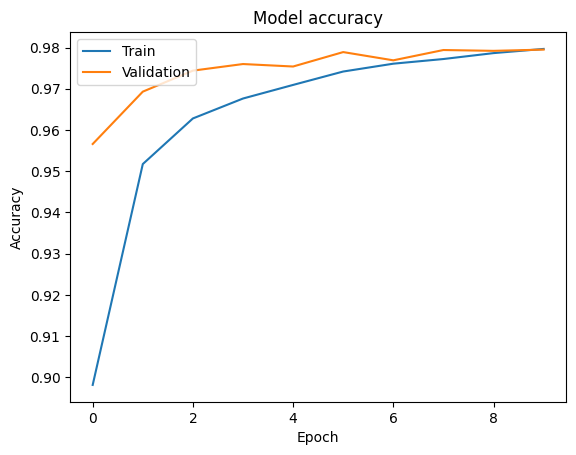

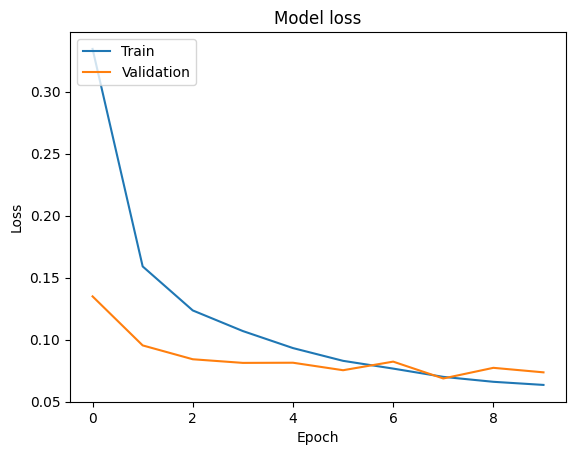

In [6]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


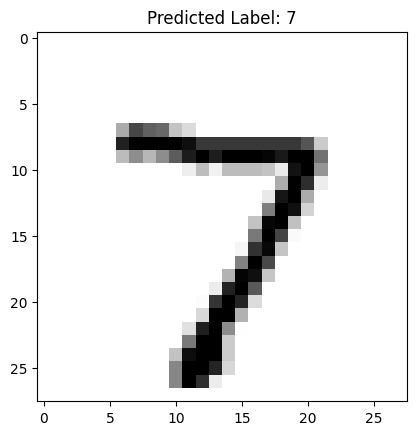

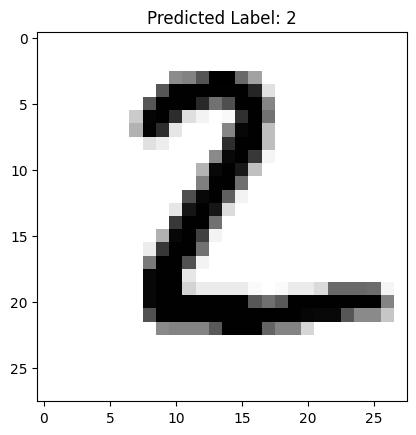

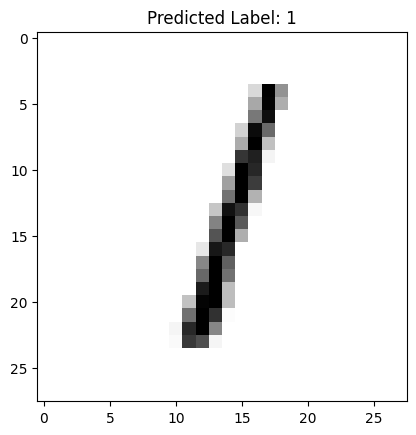

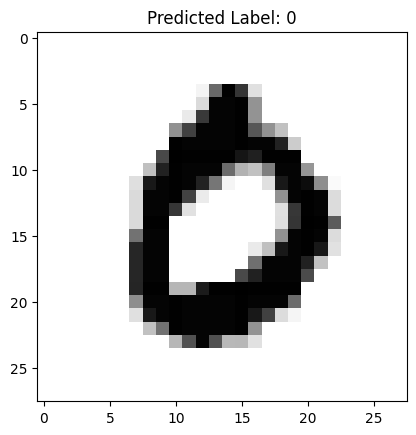

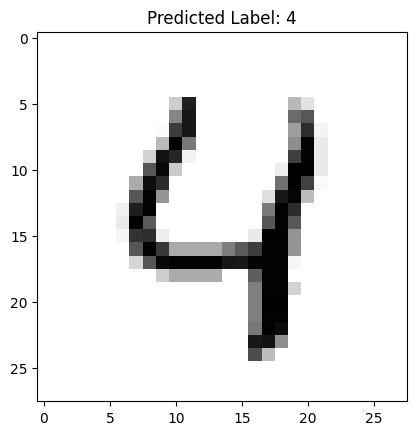

In [7]:
# Predict the first 5 images in the test set
predictions = model.predict(x_test[:5])
# Visualize the predictions
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"Predicted Label: {np.argmax(predictions[i])}")
    plt.show()
